# Faster R-CNN Training using Tensorflow
___

### Before started!
- navigate to `Runtime` menu, and choose `change runtime type`,
- then, change `hardware acceleration` to `GPU`
- click `connect` button in top-right colab

# 1. Install Library
### 1.A. Install Tensorflow 1.15 & OpenCV 4.4.0

In [2]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install tensorflow_gpu==1.15

     -------------------------------------- 294.5/294.5 MB 5.2 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 50.7/50.7 kB ? eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     --------------------------------------- 14.0/14.0 MB 31.2 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ------------------------------------- 422.0/422.0 kB 25.7 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 23.9 MB/s eta 0:00:00
     ------------------------------------- 503.4/503.4 kB 15.9 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 32.6 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 41.6 MB/s eta 0:00:00
  Using cached Markdown-3.4

In [3]:
!pip install opencv-python==4.4.0.46
!pip install opencv-contrib-python==4.4.0.46

     --------------------------------------- 33.5/33.5 MB 29.7 MB/s eta 0:00:00
     --------------------------------------- 40.1/40.1 MB 24.2 MB/s eta 0:00:00


### 1.B. Install Other Library & Clone Tensorflow Model

In [ ]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython tf_slim
!pip install -q pycocotools
!pip install -q Cython contextlib2 pillow lxml matplotlib

!git clone https://github.com/tensorflow/models.git

### 1.C. Build Tensorflow Model Builder

In [4]:
%pwd
%ls

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
arial.ttf                                         models/
dataset/                                          object-detection.json
dataset_builder.ipynb                             README.md
Faster_R_CNN_Training_using_Custom_Dataset.ipynb  videos/
LICENSE


In [ ]:
!pip install protobuf==3.20

In [10]:
!pip install scipy

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 24.1 MB/s eta 0:00:0000:0100:01


In [41]:
!pip install numpy==1.19.5

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 8.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [16]:
!pip install keras==2.2.5

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 kB 770.6 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [ ]:
!pip install pandas

In [ ]:
#%cd ./models/research
!protoc object_detection/protos/*.proto --python_out=. --user
%env PYTHONPATH=/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research:/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/slim:/home/byter/Downloads/ObjectDetection-Tensorflow-main/models

import os
os.environ['PYTHONPATH'] += ":/home/byter/Downloads/ObjectDetection-Tensorflow-main/models"

import sys
sys.path.append("/home/byter/Downloads/ObjectDetection-Tensorflow-main/models")

!python object_detection/builders/model_builder_test.py

In [9]:
%cd ..
%cd ./models/research
%ls
%pwd

/home/byter/Downloads/ObjectDetection-Tensorflow-main
/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
adversarial_text/    deeplab/                marco/             seq_flow_lite/
attention_ocr/       deep_speech/            nst_blogpost/      slim/
audioset/            delf/                   object_detection/  vid2depth/
autoaugment/         efficient-hrl/          pcl_rl/
cognitive_planning/  lfads/                  README.md
cvt_text/            lstm_object_detection/  rebar/


'/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research'

# 2. Prepare Dataset
### 2.A Upload and extract dataset.
- upload `dataset.zip` using this script,
- `dataset.zip` is created by running `dataset_builder.ipynb` from this repository ([ObjectDetection-Tensorflow](https://github.com/Muhammad-Yunus/ObjectDetection-Tensorflow)) in your local computer.

In [ ]:
%cd /content

import shutil
from zipfile import ZipFile
from google.colab import files
from os import path

print("Upload `dataset.zip` to colab :")
uploaded = files.upload()
  
for fileName, data in uploaded.items():
  with open('dataset.zip', 'wb') as f:
    f.write(data)
    f.close()
    print('saved dataset (.zip) file ' + fileName)

ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

### 2.B. Prepare Dataset 
- Convert XML PASCAL VOC to CSV
- Create TF_Record from generated CSV

In [59]:
%pwd

'/home/byter/Downloads/ObjectDetection-Tensorflow-main'

In [69]:
%cd ..

/home/byter/Downloads/ObjectDetection-Tensorflow-main


In [70]:
%cd ./dataset

!python xml_to_csv.py

/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Successfully converted xml to csv.
Successfully converted xml to csv.


In [65]:
%cd ./dataset-redBall

/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset-redBall


In [72]:
%pwd

'/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset'

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FMsTID2oS02jtfs1hhht")
project = rf.workspace("yolov5-kbjrk").project("raspberrypi_redball")
dataset = project.version(1).download("tfrecord")


- edit `class_text_to_int()` function in `generated_tfrecord.py` with label and index label we have.

In [ ]:
#%cd /content/dataset

!python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record --image_dir=images/train

!python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record --image_dir=images/test

# 3. Download pretrained model

- Pretrained model (Tensorflow 1 Model Zoo) : [[tensorflow github](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md)]


In [75]:
#%cd /content/dataset
%rm -rf models

%mkdir models
%mkdir models/inference_graph

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [76]:
%cd ./models

import os
import shutil
import glob
import urllib.request
import tarfile

MODEL = 'faster_rcnn_inception_v2_coco_2018_01_28'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'faster_rcnn_inception_v2'

with urllib.request.urlopen(DOWNLOAD_BASE+MODEL_FILE) as response, open(MODEL_FILE, 'wb') as out_file:
  shutil.copyfileobj(response, out_file)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/models


# 4. Copy & Edit Config File
- copy config model to `data/` folder

In [77]:
CONFIG_NAME = "faster_rcnn_inception_v2_coco.config"
shutil.copy(
    "/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/samples/configs/" + CONFIG_NAME, 
    "/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/data/")

'/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/data/faster_rcnn_inception_v2_coco.config'

- open & edit config file in `/content/dataset/data/faster_rcnn_inception_v2_coco.config`, 

- navigate to line 10, change  `model`>`faster_rcnn`>`num_classes` to number of class on uploaded dataset (e.g/ 2).
- navigate to line 107,
```
fine_tune_checkpoint: "/Path to the pre-trained models/model.ckpt"
```
- change to 
```
/content/dataset/models/faster_rcnn_inception_v2/model.ckpt
```
- navigate to line 113, change `train_config`>`num_steps` to number of training step (e.g/ 2000)
- navigate to line 120,
```
train_input_reader: {
  tf_record_input_reader {
  input_path: "/Path to the tfrecord/train.record"
  }
  label_map_path: "/Path to label map/object-detection.pbtxt"
}
```
- change `input_path` to,
```
/content/dataset/data/train.record
```
- change `label_map_path` to,
```
/content/dataset/data/object-detection.pbtxt
```

- navigate to line 134,
```
eval_input_reader: {
tf_record_input_reader {
input_path: "/Path to the tfrecord/test.record"
}
label_map_path: "/Path to label map/object-detection.pbtxt"
}
```
- change `input_path` to,
```
/content/dataset/data/test.record
```
- change `label_map_path` to,
```
/content/dataset/data/object-detection.pbtxt
```

# 5. Train model
Make and set train directory num_train_steps and num_eval_steps values to change train and eval steps in training process.



In [78]:
import tensorflow as tf

tf.debugging.set_log_device_placement(True)
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

Tensor("Sum_9:0", shape=(), dtype=float32)


In [79]:
!cp /home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/legacy/train.py /home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [89]:

%pwd

'/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/training'

In [81]:
%cd ../..

/home/byter/Downloads/ObjectDetection-Tensorflow-main


In [83]:
%cd ./models/research/object_detection/
%rm -rf training/*

!python train.py \
  --logtostderr \
  --train_dir=training/ \
  --pipeline_config_path=/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/data/faster_rcnn_inception_v2_coco.config

/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Using TensorFlow backend.
Instructions for updating:
Use object_detection/model_main.py.
W0501 20:36:34.367809 139891775276864 deprecation.py:323] From /home/byter/miniconda3/envs/faster_rcnn/lib/python3.7/site-packages/absl/app.py:254: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.
Instructions for updating:
Please switch to tf.train.create_global_step
W0501 20:36:34.374681 139891775276864 deprecation.py:323] From /home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/legacy/trainer.py:265: create_global_step (from tf_slim.ops.variables) is deprecated and will b

# 5. Tensorboard Training Visualisation + Ngrok
- **TensorBoard** is a tool for providing the `measurements` and `visualizations` needed during the machine learning workflow. It enables `tracking` experiment `metrics` like `loss` and `accuracy`, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.
- **ngrok** is secure `introspectable tunnels` to `localhost` webhook development tool and debugging tool.

In [85]:
%cd ./training/
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/training
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-05-01 21:56:52--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  1.81MB/s    in 13s     

2023-05-01 21:57:05 (1.05 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [86]:
LOG_DIR = '/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/training/'

from IPython import get_ipython

get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


TensorBoard 1.15.0 at http://0.0.0.0:6006/ (Press CTRL+C to quit)


In [87]:
get_ipython().system_raw('./ngrok authtoken 2P757eqFKiSOcJ6RAbXvtqwwNjZ_6CFBLtXZYHRmpWaFy3REh && ./ngrok http 6006 &')

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


Authtoken saved to configuration file: /home/byter/.ngrok2/ngrok.yml


In [88]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
http://5da4-85-234-180-197.ngrok-free.app


- close ngrok - tensorboard for training log visualization

In [21]:
!ps aux | grep ngrok

root        4478  0.8  0.2 122768 29960 ?        Sl   00:53   0:00 ./ngrok http 6006
root        4534  0.0  0.0  39204  6436 ?        S    00:54   0:00 /bin/bash -c ps aux | grep ngrok
root        4536  0.0  0.0  38576  5596 ?        S    00:54   0:00 grep ngrok


In [22]:
!kill -9 4478  #<---ngrok tensorboard train pid--->

#. 6 Tensor Board Eval Visualization

In [92]:
%pwd


'/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection'

In [93]:
#%cd /content/models/research/object_detection/
!cp /home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/legacy/eval.py /home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [94]:
!pip install lvis

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


- run evaluation metric (`eval.py`) to find **mAP** of object detection model,

In [97]:
%pwd
%ls 

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
anchor_generators/                       __init__.py
box_coders/                              inputs.py
builders/                                inputs_test.py
colab_tutorials/                         legacy/
configs/                                 matchers/
CONTRIBUTING.md                          meta_architectures/
core/                                    metrics/
data/                                    model_hparams.py
data_decoders/                           model_lib.py
dataset_tools/                           model_lib_tf1_test.py
dockerfiles/                             model_lib_tf2_test.py
eval.py                                  model_lib_v2.py
eval_util.py                             model_main.py
eval_util_test.py                        model_main_tf2.py
exporter_lib_tf2_test.py                 models/
exporter_lib_v2.py                       model_tpu_main.py
ex

In [98]:
%rm -rf eval/*

!python eval.py \
  --logtostderr \
  --pipeline_config_path=/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/data/faster_rcnn_inception_v2_coco.config \
  --checkpoint_dir=training/ \
  --eval_dir=eval/

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Using TensorFlow backend.
Instructions for updating:
Use object_detection/model_main.py.
W0501 22:00:39.344133 139866009093952 deprecation.py:323] From /home/byter/miniconda3/envs/faster_rcnn/lib/python3.7/site-packages/absl/app.py:254: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.
INFO:tensorflow:Reading unweighted datasets: ['/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/valid/redBall.tfrecord']
I0501 22:00:39.366432 139866009093952 dataset_builder.py:162] Reading unweighted datasets: ['/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/valid/redBall.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/byter/Downloads/ObjectDete

In [99]:
%cd /home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/training/
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

^C


In [100]:
LOG_DIR = '/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/eval/'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6007 &'
    .format(LOG_DIR)
)

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


TensorBoard 1.15.0 at http://0.0.0.0:6007/ (Press CTRL+C to quit)


In [102]:
!killall ngrok

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [103]:
get_ipython().system_raw('./ngrok authtoken 2P757eqFKiSOcJ6RAbXvtqwwNjZ_6CFBLtXZYHRmpWaFy3REh && ./ngrok http 6007 &')

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


Authtoken saved to configuration file: /home/byter/.ngrok2/ngrok.yml


In [104]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
https://ac47-85-234-180-197.ngrok-free.app


# 7. Export trained model

Export trained model with highest step number in filename.
- change `model.ckpt-xxxxx` with `xxxxx` is number of step in trainingphase.

In [105]:
%pwd

'/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/training'

In [106]:
%cd ..

/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection


In [108]:
#%cd /content/models/research/object_detection
%rm -rf inference_graph/*

!python export_inference_graph.py \
  --input_type image_tensor \
  --pipeline_config_path /home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/data/faster_rcnn_inception_v2_coco.config \
  --trained_checkpoint_prefix /home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection/training/model.ckpt-1000 \
  --output_directory /home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset/models/inference_graph

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Using TensorFlow backend.
Instructions for updating:
Please use `layer.__call__` method instead.
W0501 23:31:34.010540 140194999809856 deprecation.py:323] From /home/byter/miniconda3/envs/faster_rcnn/lib/python3.7/site-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Scale of 0 disables regularizer.
I0501 23:31:35.510349 140194999809856 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I0501 23:31:35.662850 140194999809856 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:depth of additional conv before box pr

# 8. Generate OpenCV DNN Config for Inference
- generate `faster_rcnn_inception_v2_custom_dataset.pbtxt` for OpenCV DNN inferencing

In [109]:
%pwd

'/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection'

In [110]:
%cd ../../../

/home/byter/Downloads/ObjectDetection-Tensorflow-main


In [112]:
!python dataset/cvdnn_config_generator/tf_text_graph_faster_rcnn.py \
    --input dataset/models/inference_graph/frozen_inference_graph.pb \
    --output dataset/models/inference_graph/faster_rcnn_inception_v2_custom_dataset.pbtxt \
    --config dataset/models/inference_graph/pipeline.config

/bin/bash: /home/byter/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Number of classes: 1
Scales:            [0.25, 0.5, 1.0, 2.0]
Aspect ratios:     [0.5, 1.0, 2.0]
Width stride:      16.000000
Height stride:     16.000000
Features stride:   0.700000


# 9. Test Model (Inferencing)

- upload arial font (`arial.ttf`) from cloned repo ([ObjectDetection-Tensorflow](https://github.com/Muhammad-Yunus/ObjectDetection-Tensorflow)) using script below,

In [113]:
uploaded = files.upload()
  
for name, data in uploaded.items():
  with open('/models/research/object_detection/utils/arial.ttf', 'wb') as f:
    f.write(data)
    f.close()
    print('saved file ' + name)

NameError: name 'files' is not defined

- open `/content/models/research/object_detection/utils/visualization_utils.py` and navigate to line `212`, change *font size* to a proper value (e.g/ 50).
    ```
    try:
      font = ImageFont.truetype('arial.ttf', 50)
    except IOError:
      font = ImageFont.load_default()
    ```

- Upload image test

In [ ]:
%cd /content
# upload image from local computer to colab

from google.colab import files
from os import path

uploaded = files.upload()
  
for name, data in uploaded.items():
  with open('image1.jpg', 'wb') as f:
    f.write(data)
    f.close()
    print('saved file ' + name)

- predict on `image1.jpg`

/home/byter/Downloads/ObjectDetection-Tensorflow-main/models/research/object_detection



Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

Cast: (Cast): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/Shape: (Shape): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/strided_slice: (StridedSlice): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArray: (TensorArrayV3): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArrayUnstack/Shape: (Shape): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArrayUnstack/strided_slice: (StridedSlice): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArrayUnstack/range: (R

2023-05-01 23:39:36.043582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-01 23:39:36.044430: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce GTX 1050 major: 6 minor: 1 memoryClockRate(GHz): 1.493
pciBusID: 0000:01:00.0
2023-05-01 23:39:36.044637: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/byter/miniconda3/envs/faster_rcnn/lib/python3.7/site-packages/cv2/../../lib64::/home/byter/miniconda3/lib/:/home/byter/miniconda3/lib/python3.10/site-packages/nvidia/cudnn/lib:/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/home/byter/miniconda3/lib/:/home/byter/miniconda3/lib/python3.10/site-packa

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device


2023-05-01 23:39:38.607995: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-05-01 23:39:38.608051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      
2023-05-01 23:39:38.661337: I tensorflow/core/common_runtime/placer.cc:54] Cast: (Cast): /job:localhost/replica:0/task:0/device:CPU:0
2023-05-01 23:39:38.661384: I tensorflow/core/common_runtime/placer.cc:54] Preprocessor/map/Shape: (Shape): /job:localhost/replica:0/task:0/device:CPU:0
2023-05-01 23:39:38.661395: I tensorflow/core/common_runtime/placer.cc:54] Preprocessor/map/strided_slice: (StridedSlice): /job:localhost/replica:0/task:0/device:CPU:0
2023-05-01 23:39:38.661404: I tensorflow/core/common_runtime/placer.cc:54] Preprocessor/map/TensorArray: (TensorArrayV3): /job:localhost/replica:0/task:0/device:CPU:0
2023-05-01 23:39:38.661412: I tensorflow/core/common_runtime/placer.cc:54] Preprocessor/map/TensorArrayUnstack/Shape: (Shape): /job:localh

Cast: (Cast): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/Shape: (Shape): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/strided_slice: (StridedSlice): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArray: (TensorArrayV3): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArrayUnstack/Shape: (Shape): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArrayUnstack/strided_slice: (StridedSlice): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArrayUnstack/range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArrayUnstack/TensorArrayScatter/TensorArrayScatterV3: (TensorArrayScatterV3): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArray_1: (TensorArrayV3): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/TensorArray_2: (TensorArrayV3): /job:localhost/replica:0/task:0/device:CPU:0
Preprocessor/map/while/Enter: (Enter):

2023-05-01 23:39:39.908591: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 135475200 exceeds 10% of system memory.


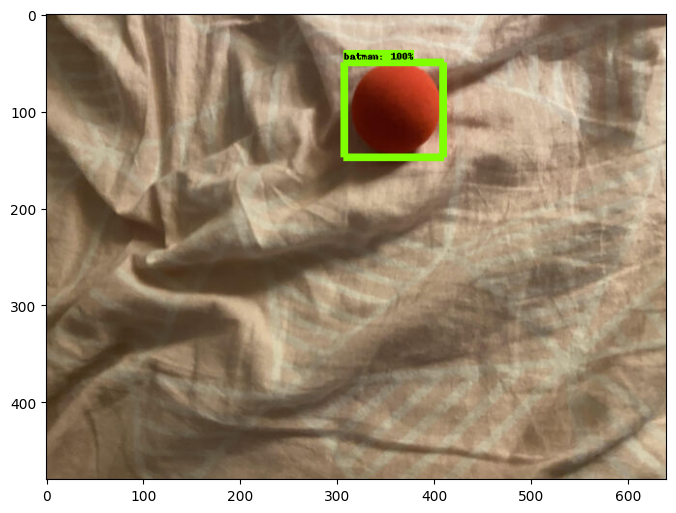

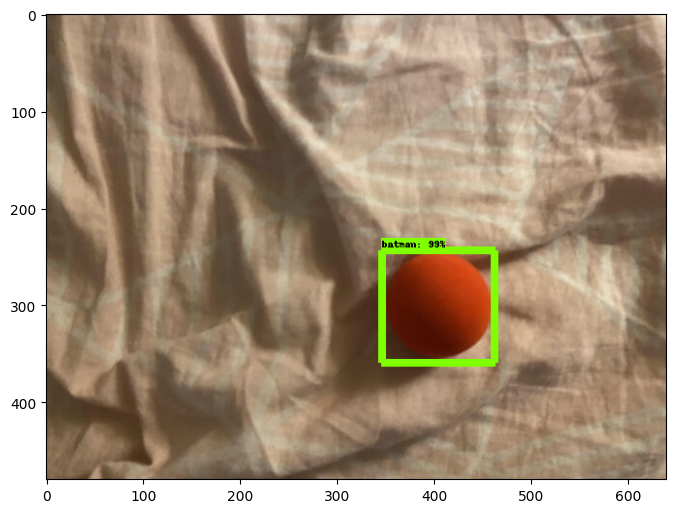

In [115]:
%cd ./models/research/object_detection

# [NOTE!] this sample implementation using Tensorflow ver 1.14

import os
import sys
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

from utils import label_map_util
from object_detection.utils import ops as utils_ops
from utils import visualization_utils as vis_util
import importlib
importlib.reload(vis_util)

# This is needed to display the images.
%matplotlib inline

DATASET_FOLDER_PATH = '/home/byter/Downloads/ObjectDetection-Tensorflow-main/dataset'
# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = f'{DATASET_FOLDER_PATH}/models/inference_graph' + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(f'{DATASET_FOLDER_PATH}/data', 'object-detection.pbtxt')

NUM_CLASSES = 2 #[TODO!] change to number of training class

TEST_IMAGE_PATHS = [ os.path.join('/home/byter/Downloads/ObjectDetection-Tensorflow-main/test_images/', '{}.jpg'.format(i)) for i in range(1, 3) ]

IMAGE_SIZE = (8, 17)

# load frozen inference graph
frcnn_graph = tf.Graph()
with frcnn_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
# load label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# PIL image to numpy array converter
def PIL_to_numpy(image):
  (w, h) = image.size

  return np.array(image.getdata()).reshape((h, w, 3)).astype(np.uint8)

def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
          
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
                                      'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict


# -------------- main block --------------
for image_path in TEST_IMAGE_PATHS:
  # read image using PIL
  image = Image.open(image_path)
  image_np = PIL_to_numpy(image)

  # predict image
  output_dict = run_inference_for_single_image(image_np, frcnn_graph)

  # draw bousing box using `vis_util`
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  
  # show image
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  

# 10. Zip  & Download Inference Graph

In [ ]:
%cd /content/dataset/models
!zip -r inference_graph.zip inference_graph/frozen_inference_graph.pb inference_graph/faster_rcnn_inception_v2_custom_dataset.pbtxt

from google.colab import files
files.download("inference_graph.zip")

___
# Source :
- https://muchamadsyaiffudin.medium.com/object-detection-with-custom-dataset-faster-rcnn-on-google-colab-33b373a625eb
- https://colab.research.google.com/drive/1skc-BJ6HzuaIRbi3diP86lRnCTcNCond?usp=sharing